In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'galaxy distance versus red shift ')

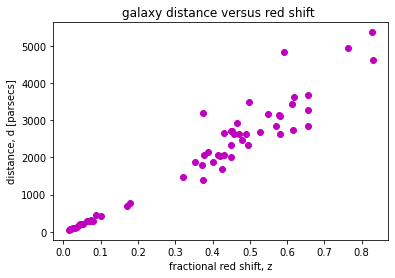

In [ ]:
#hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble-low-z.txt")
hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble.txt")
x = hubbledata[:,0]
y = hubbledata[:,1]
N = x.size

plt.plot( x, y, 'mo')
plt.xlabel("fractional red shift, z")
plt.ylabel("distance, d [parsecs]")
plt.title('galaxy distance versus red shift ')

In [ ]:
M = np.column_stack( (x,np.ones(N)))             # define matrix M

MTM = np.dot( M.transpose(), M)                  # 2x2 matrix
MTMINV = np.linalg.inv(MTM)                      # 2x2 matrx
MTY = np.dot(M.transpose(),y)                    # 2-element vector

pars = np.dot(MTMINV,MTY)
yf =  np.dot(M,pars)
residuals = yf-y
chisq = np.sum(residuals**2)
var = chisq / (N-2)
covs=MTMINV*var

HoINV = pars[0]*3.26e6 # conversion factor 3.26r6 c-yr / c
print("Hubble time billion years", HoINV*1e-9)
print("curvature = ",pars[0]," +/- ",np.sqrt(covs[0,0]))
print("slope = ",pars[1]," +/- ",np.sqrt(covs[1,1]))
#print("ofdset = ",pars[2]," +/- ",np.sqrt(covs[2,2]))
print("chisq/ndf",var)

Hubble time billion years 18.768652289505436
curvature =  5757.255303529275  +/-  217.80005915132475
slope =  -128.9300592460686  +/-  94.05146078889815
chisq/ndf 158654.05544846723


Hubble time billion years 18.768652289505436
curvature =  5757.255303529275  +/-  217.80005915132475
slope =  -128.9300592460686  +/-  94.05146078889815
chisq/ndf 158654.05544846723


Text(0.5, 1.0, 'galaxy distance versus red shift ')

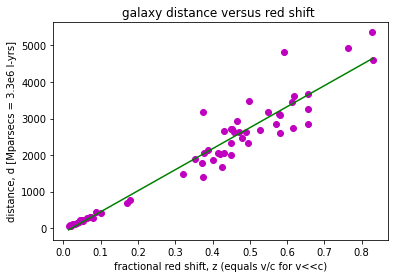

In [ ]:
plt.plot(x,y,'mo')
yf =  np.dot(M,pars)
plt.plot(x,yf,"g-")
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')